# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama: Anindita Gayatri
- **Email:agayatri123@yahoo.co.id
- **ID Dicoding:anindita_gayatri_ukA6

## Import Semua Packages/Library yang Digunakan

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd "drive/MyDrive"

/content/drive/MyDrive


## Data Preparation

In [7]:
import os
os.listdir("LogosFootball")

['leeds',
 'crystal-palace',
 'burnley',
 'everton',
 'aston-villa',
 'arsenal',
 'brentford',
 'leicester-city',
 'chelsea',
 'brighton',
 'southampton',
 'wolves',
 'liverpool',
 'tottenham',
 'newcastle',
 'west-ham',
 'watford',
 'norwich',
 'manchester-city',
 'manchester-united']

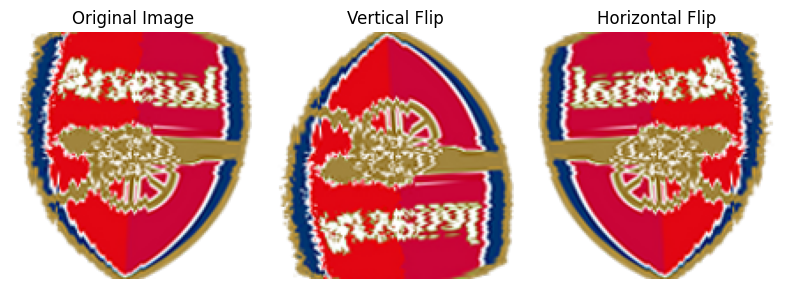

In [8]:
# Fliping dataset
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Membaca citra
image_path = "LogosFootball/arsenal/00451122-7e55-4388-a7f1-9c2ba87409c0.png"
image = Image.open(image_path)

# Menampilkan citra asli
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

# Transformasi untuk flip vertikal
vertical_flip = transforms.Compose([
    transforms.RandomVerticalFlip(p=1)
])
flipped_image_vertical = vertical_flip(image)

# Menampilkan citra setelah flip vertikal
plt.subplot(1, 3, 2)
plt.title("Vertical Flip")
plt.imshow(flipped_image_vertical)
plt.axis('off')

# Transformasi untuk flip horizontal
horizontal_flip = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1)
])
flipped_image_horizontal = horizontal_flip(image)

# Menampilkan citra setelah flip horizontal
plt.subplot(1, 3, 3)
plt.title("Horizontal Flip")
plt.imshow(flipped_image_horizontal)
plt.axis('off')

plt.tight_layout()
plt.show()

### Data Loading

### Data Preprocessing

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split=0.2,
                    fill_mode = 'nearest',
                    )

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    )

base_dir ='LogosFootball'
train_generator = train_datagen.flow_from_directory(
        base_dir,
        subset="training",
        target_size=(150, 150),
        batch_size=32,

        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        subset="validation",
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 16001 images belonging to 20 classes.
Found 4000 images belonging to 20 classes.


#### Split Dataset

## Modelling

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,290,580 (8.74 MB)

 Trainable params: 2,290,580 (8.74 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10,
    verbose=2,
    )

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 - 449s - 22s/step - accuracy: 0.2344 - loss: 2.5369 - val_accuracy: 0.5281 - val_loss: 1.6398
Epoch 2/20
20/20 - 278s - 14s/step - accuracy: 0.6703 - loss: 1.0755 - val_accuracy: 0.7875 - val_loss: 0.6814
Epoch 3/20
20/20 - 229s - 11s/step - accuracy: 0.8219 - loss: 0.5548 - val_accuracy: 0.9062 - val_loss: 0.3124
Epoch 4/20
20/20 - 159s - 8s/step - accuracy: 0.9187 - loss: 0.2425 - val_accuracy: 0.9656 - val_loss: 0.1203
Epoch 5/20
20/20 - 155s - 8s/step - accuracy: 0.9672 - loss: 0.1121 - val_accuracy: 0.9531 - val_loss: 0.1261
Epoch 6/20
20/20 - 183s - 9s/step - accuracy: 0.9375 - loss: 0.1774 - val_accuracy: 0.9812 - val_loss: 0.0864
Epoch 7/20
20/20 - 175s - 9s/step - accuracy: 0.9797 - loss: 0.0703 - val_accuracy: 0.9563 - val_loss: 0.1512
Epoch 8/20
20/20 - 167s - 8s/step - accuracy: 0.9766 - loss: 0.0958 - val_accuracy: 0.9719 - val_loss: 0.0904
Epoch 9/20
20/20 - 155s - 8s/step - accuracy: 0.9844 - loss: 0.0501 - val_accuracy: 0.9937 - val_loss: 0.0318
Epoch 10/20
20/20 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 - 173s - 9s/step - accuracy: 0.9594 - loss: 0.1136 - val_accuracy: 0.9563 - val_loss: 0.1069
Epoch 15/20
20/20 - 124s - 6s/step - accuracy: 0.9547 - loss: 0.2083 - val_accuracy: 0.9563 - val_loss: 0.1101
Epoch 16/20
20/20 - 116s - 6s/step - accuracy: 0.9812 - loss: 0.0691 - val_accuracy: 0.9750 - val_loss: 0.0750
Epoch 17/20
20/20 - 110s - 6s/step - accuracy: 0.9906 - loss: 0.0290 - val_accuracy: 0.9812 - val_loss: 0.0509
Epoch 18/20
20/20 - 95s - 5s/step - accuracy: 0.9906 - loss: 0.0346 - val_accuracy: 0.9844 - val_loss: 0.0376
Epoch 19/20
20/20 - 105s - 5s/step - accuracy: 0.9859 - loss: 0.0311 - val_accuracy: 0.9875 - val_loss: 0.0370
Epoch 20/20
20/20 - 107s - 5s/step - accuracy: 0.9953 - loss: 0.0174 - val_accuracy: 0.9906 - val_loss: 0.0181


In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
%matplotlib inline

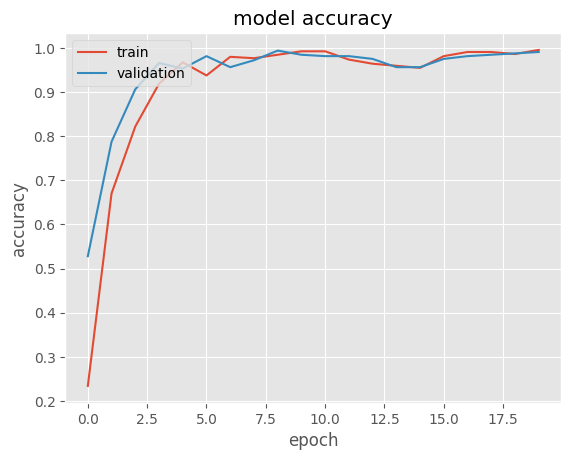

In [24]:
plt.style.use("ggplot")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

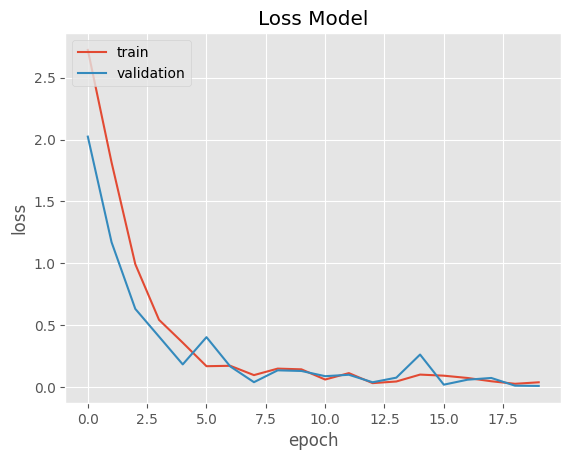

In [ ]:
plt.style.use("ggplot")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluasi dan Visualisasi

Saving 0ad7fe67-ab4e-47e7-848d-30a7b1cc6cb9.png to 0ad7fe67-ab4e-47e7-848d-30a7b1cc6cb9.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
0ad7fe67-ab4e-47e7-848d-30a7b1cc6cb9.png
chelsea


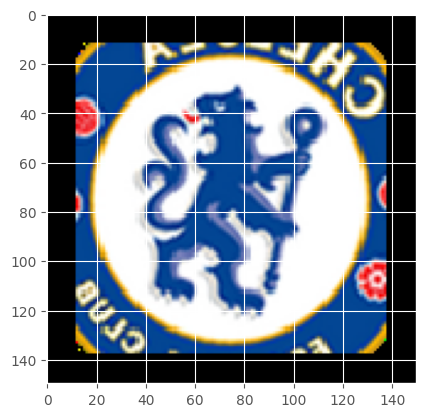

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(fn)
  if output_class==0:
    print("arsenal")
  elif output_class==1:
    print("aston-villa")
  elif output_class==2:
    print("brentford")
  elif output_class==3:
    print("brighton")
  elif output_class==4:
    print("burnley")
  elif output_class==5:
    print("chelsea")
  elif output_class==6:
    print("crystal-palace")
  elif output_class==7:
    print("everton")
  elif output_class==8:
    print("leeds")
  elif output_class==9:
    print("leicester-city")
  elif output_class==10:
    print("liverpool")
  elif output_class==11:
    print("manchester-city")
  elif output_class==12:
    print("manchester-united")
  elif output_class==13:
    print("newcastle")
  elif output_class==14:
    print("norwich")
  elif output_class==15:
    print("southampton")
  elif output_class==16:
    print("tottenham")
  elif output_class==17:
    print("watford")
  elif output_class==18:
    print("west-ham")
  else:
    print("wolves")

## Konversi Model

In [ ]:
model.save("model.h5")
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 117.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
2024-09-07 12:30:49.255262: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-07 12:30:49.274602: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-07 12:30:49.280302: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to re

## Inference (Optional)

In [ ]:
# Menyimpan dalam format SavedModel/
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

In [ ]:
# Convert SavedModel menjadi model.tflife
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
open("converted_model.tflite","wb").write(tflite_model)

Saved artifact at '/tmp/tmpnelna8ek'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)
Captures:
  139845370128240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845370186912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845370199056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845370193424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845370307056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845370309344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845370311808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845370314096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845370133344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845370130176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13984537051494

9166904

In [ ]:
import * as tf from '@tensorflow/tfjs'

SyntaxError: invalid syntax (<ipython-input-32-4538b868938c>, line 1)

In [2]:
# !pip install tensorflowjs
# Mengonversi model H5 ke format TF-JS

!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

print("Model converted to TF-JS format and saved to 'tfjs_model'")

2024-09-10 00:53:33.143966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 00:53:33.177471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 00:53:33.189045: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 00:53:33.212827: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 00:53:34.257816: W tensorflow/comp

In [ ]:
pip freeze > requirements.txt